In [4]:
import os
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_images_and_labels(image_dir):
    images = []
    labels = []

    for folder in ['train', 'test']:
        folder_path = os.path.join(image_dir, folder)
        for image_fname in os.listdir(folder_path):
            if image_fname.endswith('.jpg'):
                image_path = os.path.join(folder_path, image_fname)
                image = cv2.imread(image_path)
                images.append(image)
                # Extract label from filename
                image_re = re.match(r'([0-9]+)_([0-9]+)\.jpg', image_fname)
                label = int(image_re.group(2))
                labels.append(label)
    return images, labels

images, labels = read_images_and_labels('./coral_image_jpg')

In [28]:
def print_image_details(images, max_rows=5, max_cols=5):
    for idx, image in enumerate(images):
        print(f"Image {idx + 1}")
        print(f"Dimension: {image.shape}")
        
        limited_image = image[:max_rows, :max_cols]

        pixel_values = limited_image.tolist()
        print("Pixel Values:")
        print(pixel_values)
        print("\n" + "-"*40 + "\n")
print_image_details(images)

Image 1
Dimension: (225, 225, 3)
Pixel Values:
[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]

----------------------------------------

Image 2
Dimension: (225, 225, 3)
Pixel Values:
[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]]

----------------------------------------

Image 3
Dimension: (225, 225, 3)
Pixel Values:
[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0,

In [7]:
def analyze_image_dimensions(images):
    dimensions = [image.shape[:2] for image in images]
    unique_dimensions = set(dimensions)
    print(f"Unique image dimensions: {unique_dimensions}")

analyze_image_dimensions(images)

Unique image dimensions: {(225, 225)}


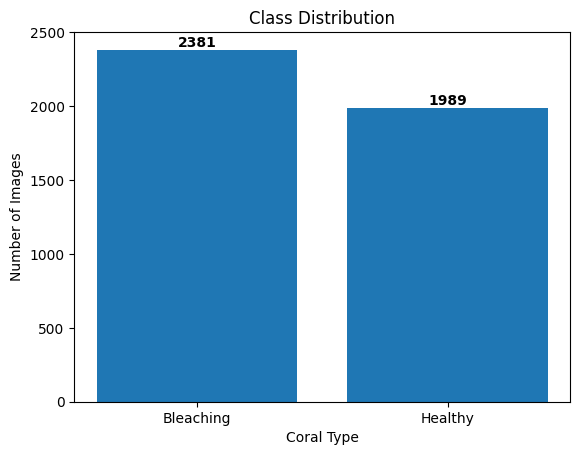

In [31]:
def plot_class_distribution(labels):
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts, tick_label=['Bleaching', 'Healthy'])
    plt.xlabel('Coral Type')
    plt.ylabel('Number of Images')
    plt.title('Class Distribution')
    for i, count in enumerate(counts):
        plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold')

    plt.show()
plot_class_distribution(labels)

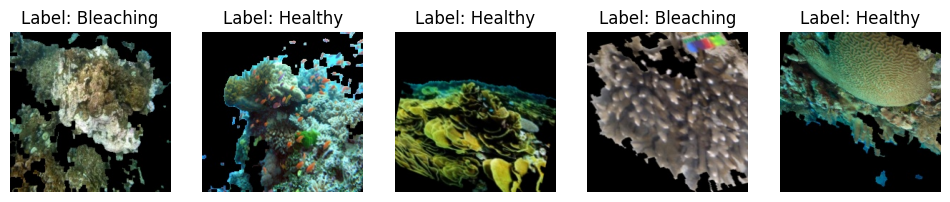

In [21]:
def visualize_sample_images(images, labels, num_samples=5):
    plt.figure(figsize=(12, 6))
    indices = np.random.choice(range(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
        plt.title(f"Label: {'Healthy' if labels[idx] == 1 else 'Bleaching'}")
        plt.axis('off')
    plt.show()

visualize_sample_images(images, labels)